<a href="https://colab.research.google.com/github/Mahima-2111/Data_Appliances_Energy/blob/main/Data_Appliances_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

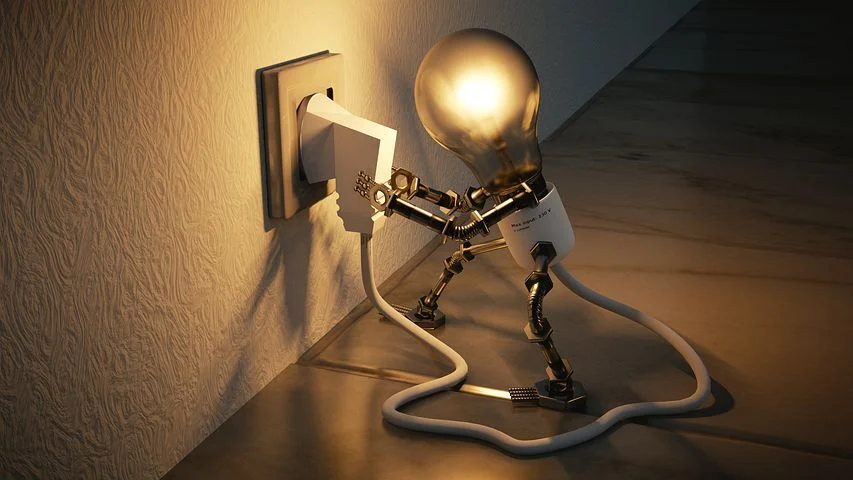

**Appliance Energy Prediction**

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances .
In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors. 

**Problem Statement**

We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset

**Attribute Information**

1. ***date*** time year-month-day hour:minute:second

2. ***Appliances***, energy use in Wh (**Dependent variable**)

3. ***lights***, energy use of light fixtures in the house in Wh (Drop this column)

4. ***T1***, Temperature in kitchen area, in Celsius

5. ***RH1***, Humidity in kitchen area, in % 

6. ***T2***, Temperature in living room area, in Celsius 

7. ***RH2***,Humidity in living room area, in %

8. ***T3***, Temperature in laundry room area

9. ***RH3***, Humidity in laundry room area, in % 

10. ***T4***, Temperature in office room, in Celsius 

11. ***RH4***,Humidity in office room, in %

12. ***T5***, Temperature in bathroom, in Celsius

13. ***RH5***, Humidity in bathroom, in % 

14. ***T6***, Temperature outside the building (north side), in Celsius

15. ***RH6***, Humidity outside the building (north side), in %

16. ***T7***, Temperature in ironing room , in Celsius

17. ***RH7***, Humidity in ironing room, in % 

18. ***T8***, Temperature in teenager room 2, in Celsius 

19. ***RH8***,Humidity in teenager room 2, in %


20. ***T9***, Temperature in parents room, in Celsius

21. ***RH9***, Humidity in parents room, in % 

22. ***To***, Temperature outside (from Chievres weather station), in
Celsius 

23. ***Pressure*** (from Chievres weather station), in mm Hg 

24. ***RHout***, Humidity outside (from
Chievres weather station), in %

25. ***Wind speed*** (from Chievres weather station), in m/s

26. ***Visibility*** (from Chievres weather station), in km

27. ***Tdewpoint*** (from Chievres weather station), Â°C

28. ***rv1***, Random variable 1, nondimensional

29. ***rv2***, Random variable 2, nondimensional


In [46]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the data**

In [3]:
file_path = ('/content/drive/MyDrive/ML_Data_App_Energy_Project/data_application_energy.csv')
df = pd.read_csv(file_path)

**Data Exploration**

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.shape

(19735, 29)

Number of instances: 19,735

Number of attributes: 29

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
# #Number of null values in all columns

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As shown above , there are no null values in the dataset

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
temp = {
    'T1' : 'kitchen_temp', 'T2' : 'living_temp', 'T3' : 'laundry_temp', 
    'T4' : 'office_temp', 'T5' : 'bath_temp', 'T6' : 'outside_temp',
    'T7' : 'ironing_temp', 'T8' : 'teen_temp', 'T9' : 'parents_temp', 'T_out' : 'station_temp'
}

In [10]:
energy = df.rename(columns=temp)

In [11]:
humid = {
    'RH_1' : 'kitchen_humid', 'RH_2' : 'living_humid', 'RH_3' : 'laundry_humid', 
    'RH_4' : 'office_humid', 'RH_5' : 'bath_humid', 'RH_6' : 'outside_humid',
    'RH_7' : 'ironing_humid', 'RH_8' : 'teen_humid', 'RH_9' : 'parents_humid', 'RH_out' : 'station_humid'
}

In [12]:
energy = energy.rename(columns=humid)

## ***Data Visualization***

In [13]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [14]:
import chart_studio.plotly as pyp
import plotly.graph_objs as go

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
import math
import datetime
from datetime import datetime
%matplotlib inline
import sklearn
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

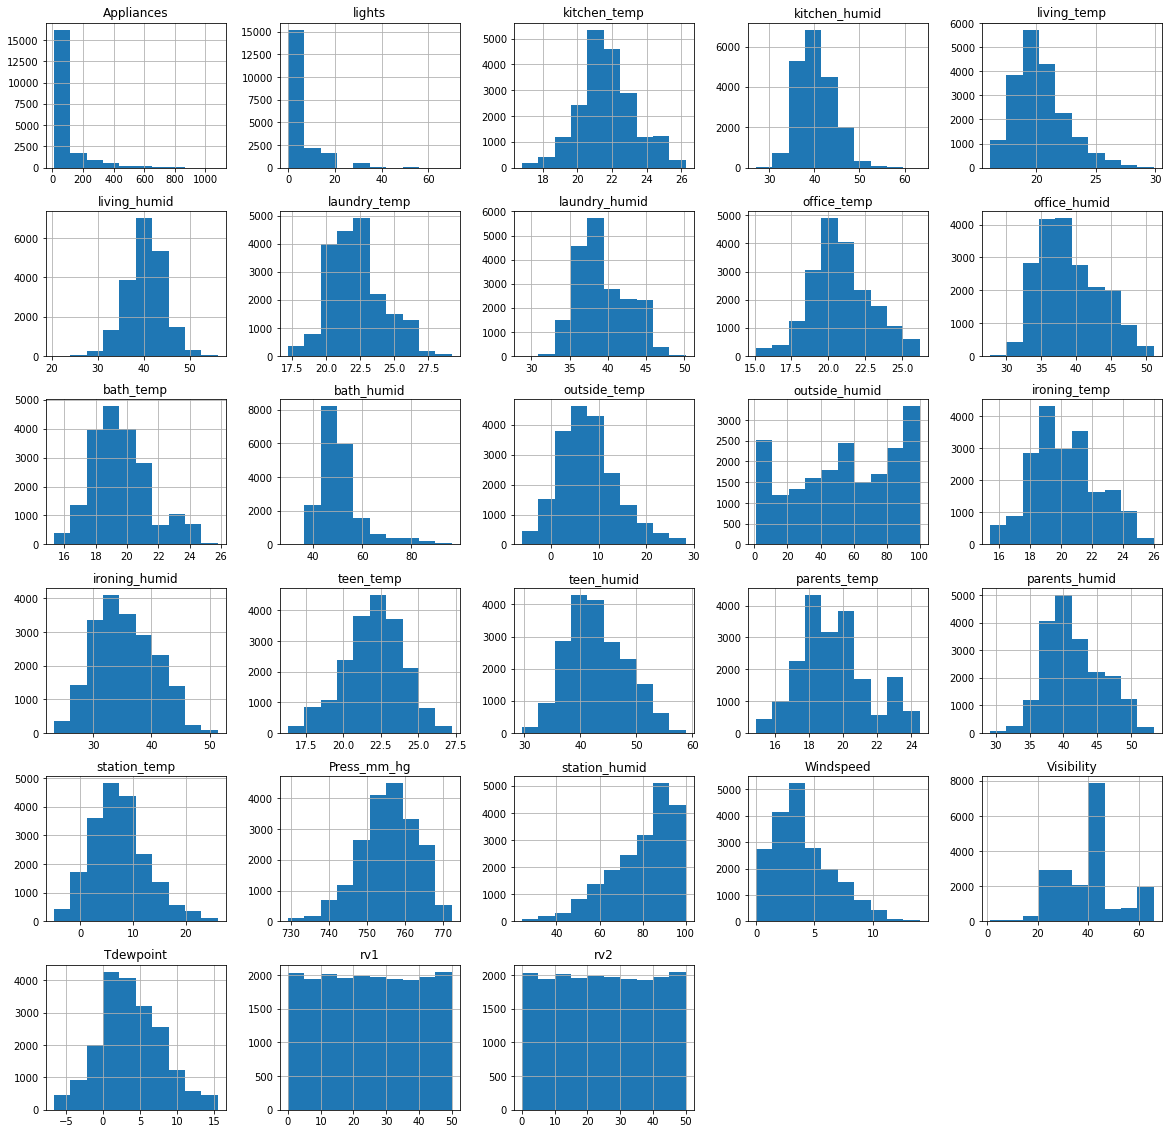

In [16]:
p = energy.hist(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

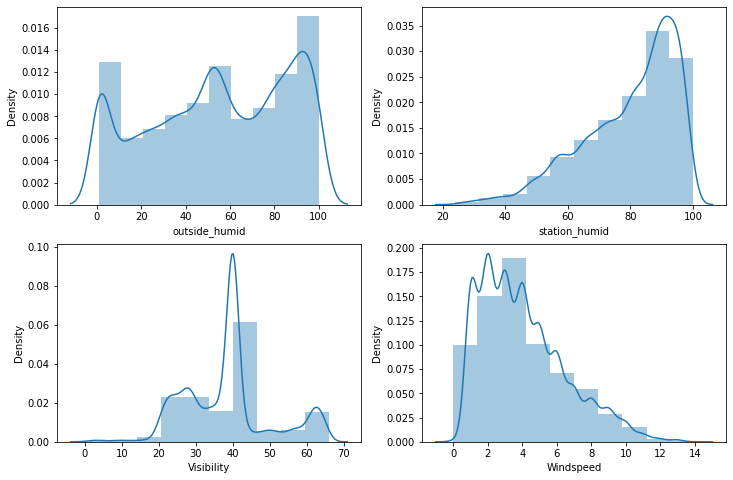

In [17]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(energy["outside_humid"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(energy["station_humid"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(energy["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(energy["Windspeed"],bins=10, ax=ax[1][1])

***Observations⚡***

***Temperature*** - All the columns follow normal distribution except T9

***Humidity*** - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house

***Visibilty*** - This column is negatively skewed

***Windspeed*** - This column is postively skewed

In [18]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

As maximum value in lights attribute is 0, it wont be playing much role in our model. Hence we are dropping the lights attribute from our dataset.

In [19]:
energy = energy.drop('lights', axis=1)

In [20]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2'],
      dtype='object')

**Forming DataFrame**

We need to form a new DataFrame df_dateNappli with right attributes to plot graphs.

We take date and Appliances attributes into the df_dateNappli DataFrame. When we created the new DataFrame, date attribute's type has been changed to objects. Now we need to convert it back to datetime64[ns] type. Then we will set the new DataFrame's index as date.

In [21]:
df_dateNappli = pd.DataFrame({'date': energy['date'], 'Appliances': energy['Appliances']})
df_dateNappli.date=df_dateNappli.date.astype('datetime64[ns]')
df_dateNappli.set_index('date', inplace=True)

**Energy consumption**

**Appliances energy consumption measurement for the whole period**

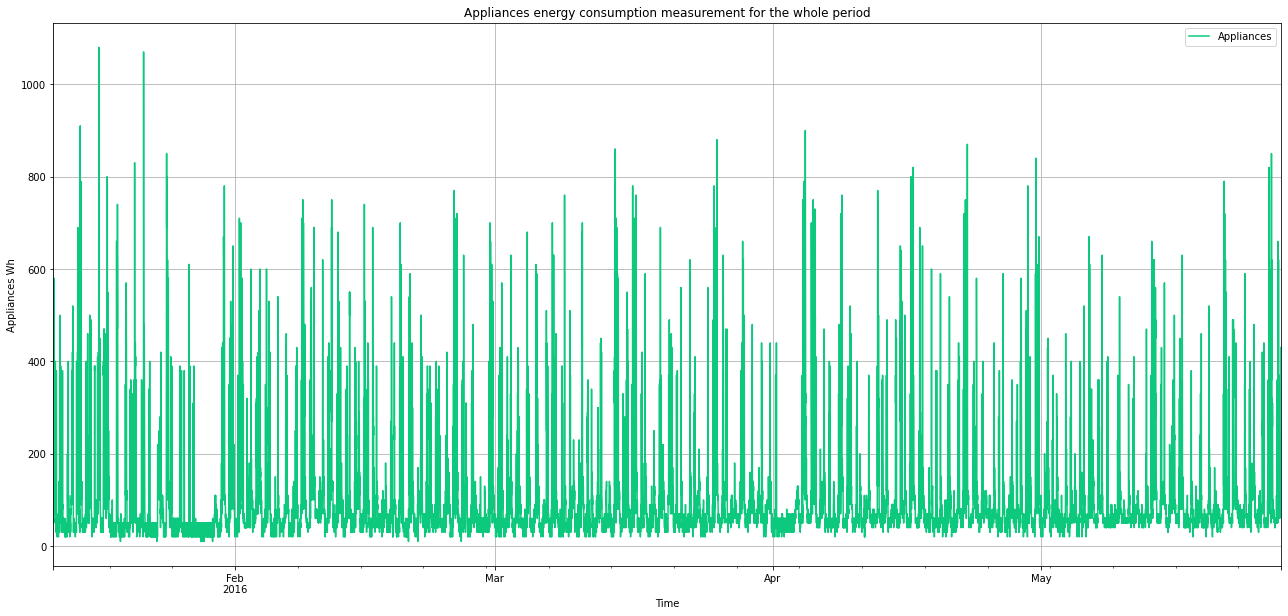

In [23]:
df_dateNappli.plot(color="#0cc97d")
plt.rcParams["figure.figsize"] = (22,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

Here it shows the energy consumption profile for the period. The energy consumption profile shows a high variability. We can see from here that the highest Appliances Wh is around 1100 and it was in January month. Also, we can see that, at the end of January, February and March, there were big fall down in Appliances useage.

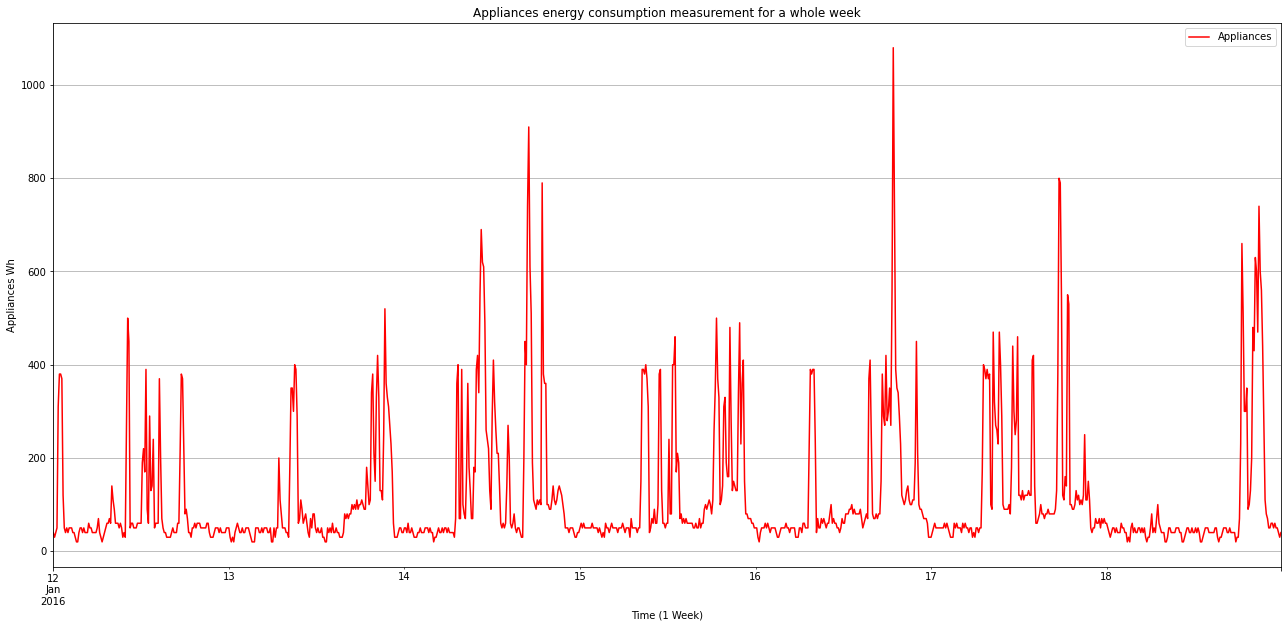

In [24]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

**Insights⚡**: 

Can see from here that the highest Appliances Wh is around 1100 and it was on 16th of January. Also, we can see that, it follows a bit of a pattern though it is not a strong one.

**Energy Consumption pattern of the household at different times of the day over different time periods**

In [25]:
energy['weekday'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 0).astype(int)
energy['hour'] = pd.to_datetime(energy['date']).dt.hour
energy['month'] = pd.to_datetime(energy['date']).dt.month

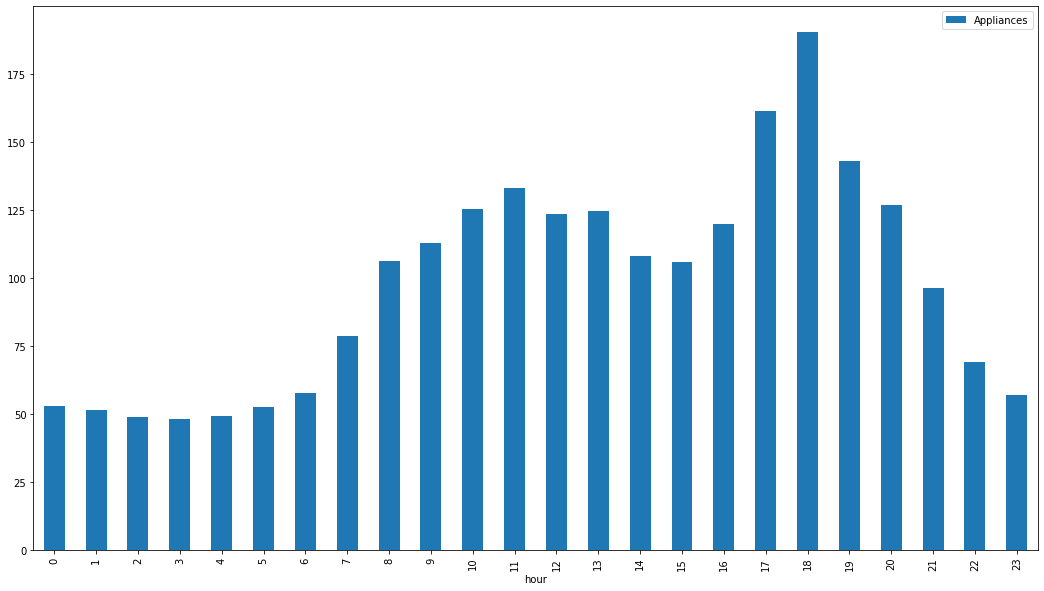

In [26]:
energy.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

**Insights ⚡**: Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 6 PM is comparatively higher and sharper.

We observe that over the sleeping hours (10 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

**What about weekdays and weekends?**

In [27]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation

energy['WEEKDAY'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
energy['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

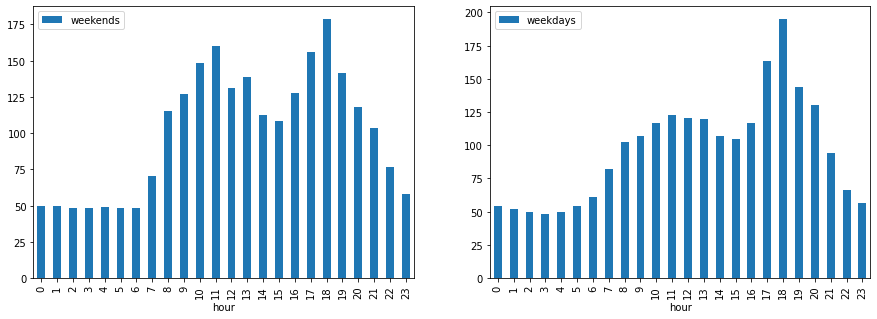

In [28]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = energy.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

**Insights ⚡**: We observe that the energy consumption of appliances during the 8 AM - 4 PM is higher in weekends compared to the weekdays. Also, average overall consumption in weekends is pretty high.

**Appliances energy consumption distribution. The histogram shows the frequency of energy consumption in the interval.**

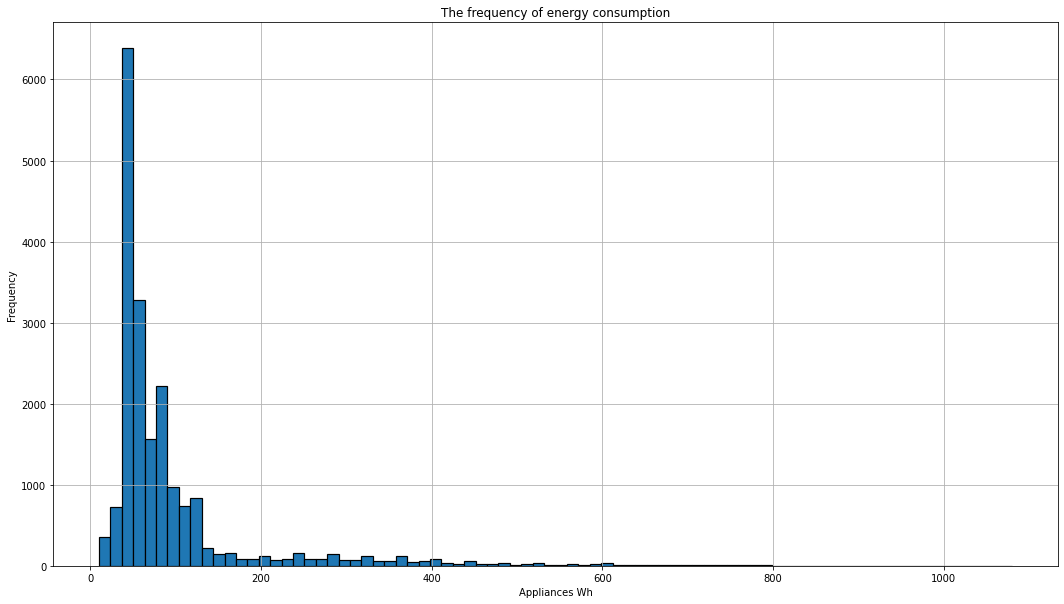

In [29]:
plt.hist(df_dateNappli.Appliances, bins=80, edgecolor='black', linewidth=1.2)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('The frequency of energy consumption')
plt.grid()
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



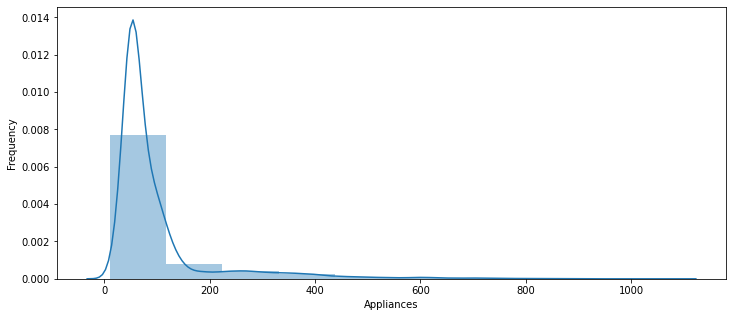

In [30]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(energy['Appliances'] , bins=10 )

In [31]:
target_var = energy['Appliances']

In [32]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_var[target_var <= 200].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 200 Wh
90.29136052698252


**Insights⚡**:

1. 90% of Appliance consumption is less than 200 Wh . 

2. This column is postively skewed , most the values are around mean 100 Wh .

3. There will be outliers in this column.

4. There are small number of cases where consumption is very high.

**The boxplot shows the location of the median with the black line.**

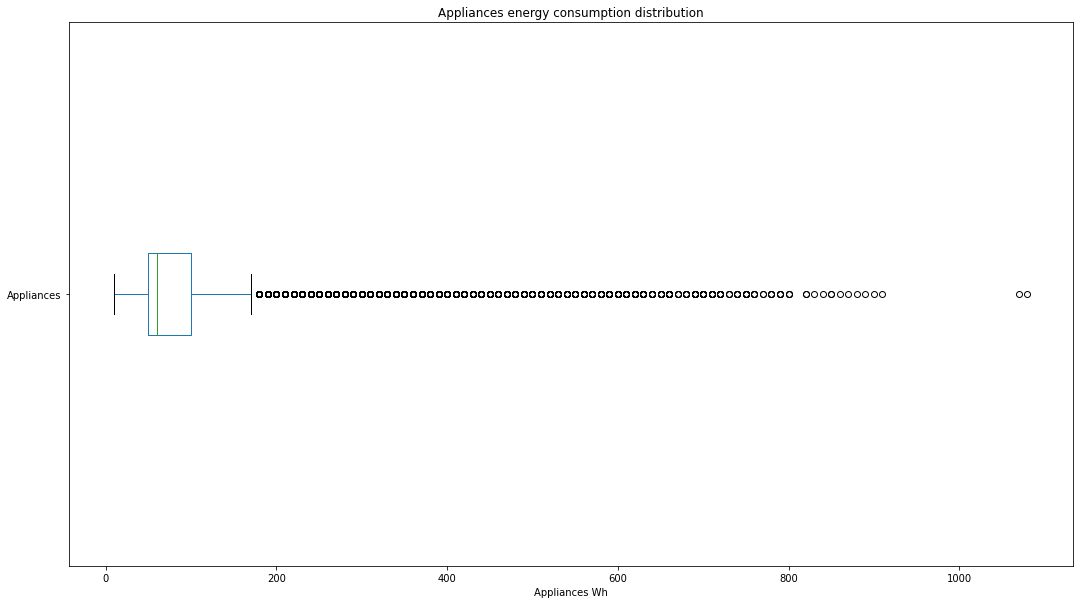

In [33]:
ax = df_dateNappli.Appliances.plot.box(vert=False)
plt.xlabel('Appliances Wh')
plt.title('Appliances energy consumption distribution')
plt.show()

In [34]:
energy[temp.values()].describe()

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,outside_temp,ironing_temp,teen_temp,parents_temp,station_temp
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


**Observations**⚡:

1. Outside Average temperature over a period of 4.5 months is around 7.5 degrees and ranges from -6(min) to 28(max) degrees.

2. Inside the building avarage temperature has been around 20 degrees for all the rooms and ranges from 14(min) to 30(max) degrees.

**Note**: These points implies that warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation b/w temperature and consumption of energy inside the house.

In [35]:
energy[humid.values()].describe()

,kitchen_humid,living_humid,laundry_humid,office_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_humid
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


***Observations*** :

Outside the building average temp ***>*** average humidity inside the house.

Average humidity at the weather station ***>*** outside humidity near the building.

Average humidity in the bathroom ***>*** other rooms due to obvious reasons.

Kids and parent room show a comparatively higher average humidity.

**Exploratory data analysis**

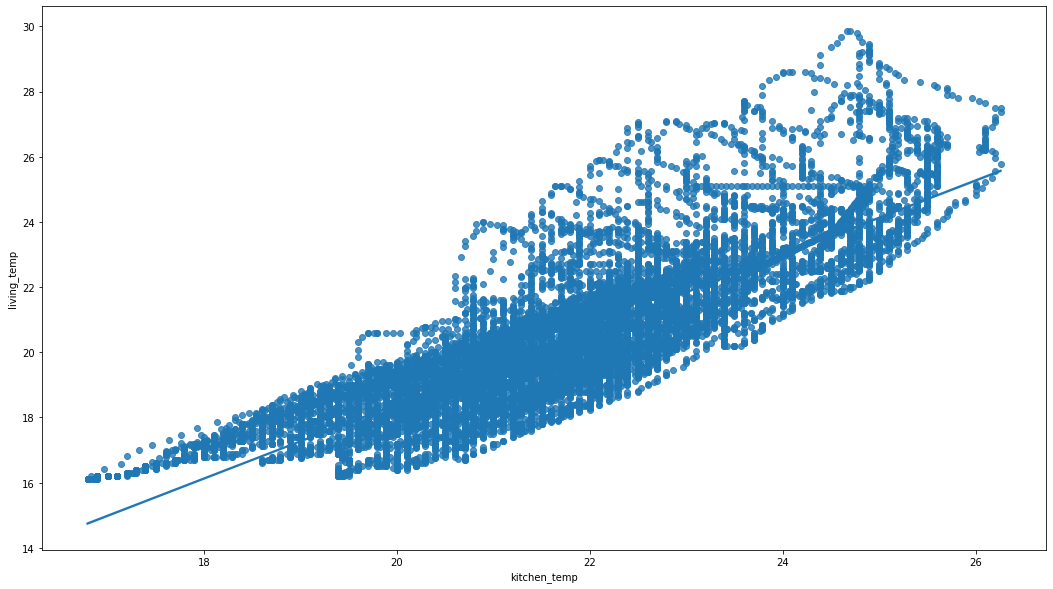

In [36]:
sns.regplot(x=energy['kitchen_temp'], y=energy['living_temp'])

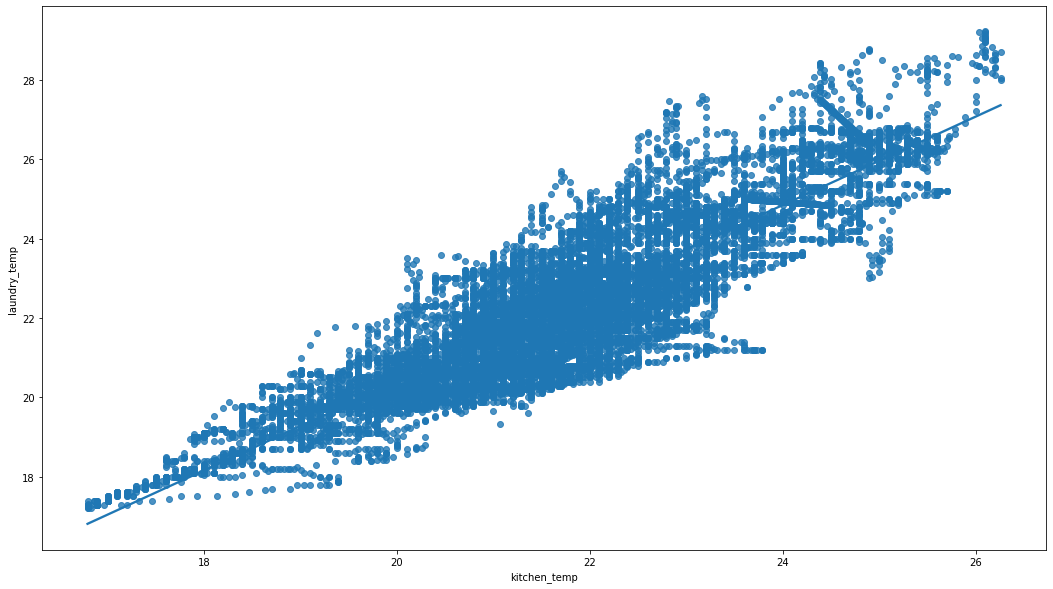

In [37]:
sns.regplot(x=energy['kitchen_temp'], y=energy['laundry_temp'])

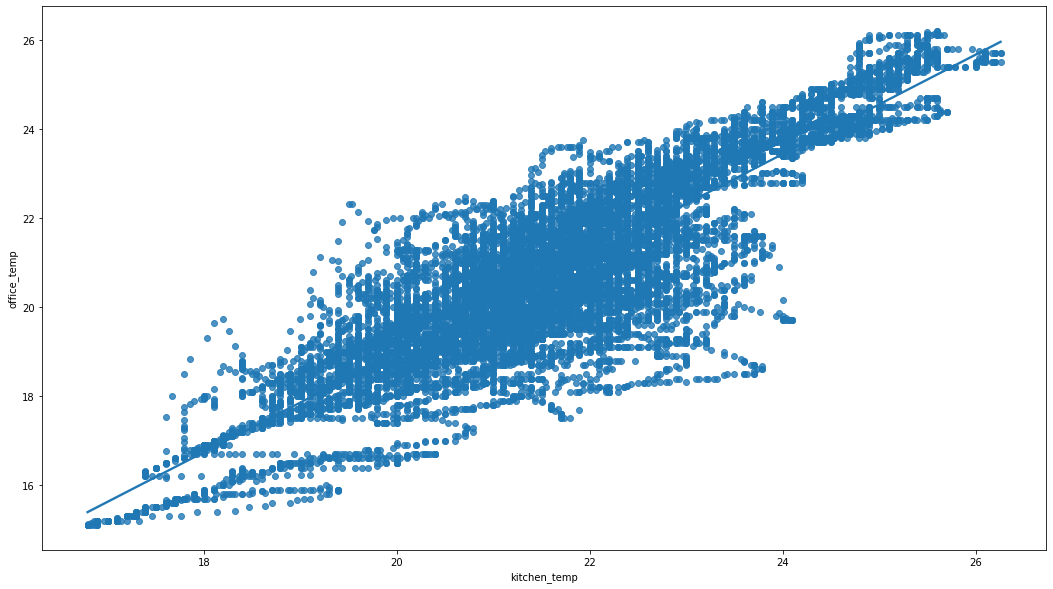

In [38]:
sns.regplot(x=energy['kitchen_temp'], y=energy['office_temp'])

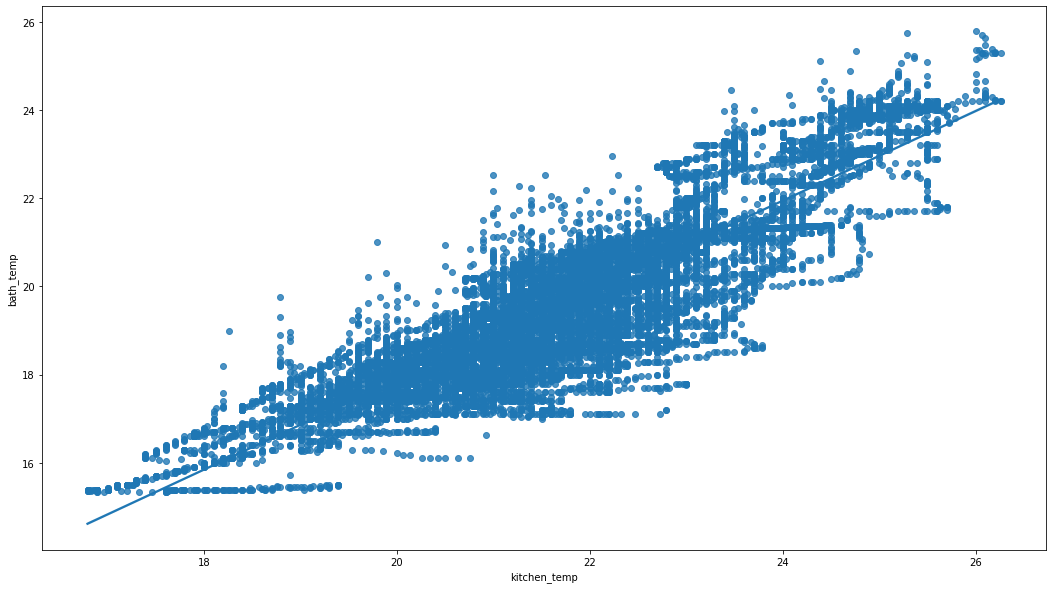

In [39]:
sns.regplot(x=energy['kitchen_temp'], y=energy['bath_temp'])

In [40]:
from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(energy,test_size=0.25,random_state=40)

**Lets look at correlation matrix of temperature and humidity levels**

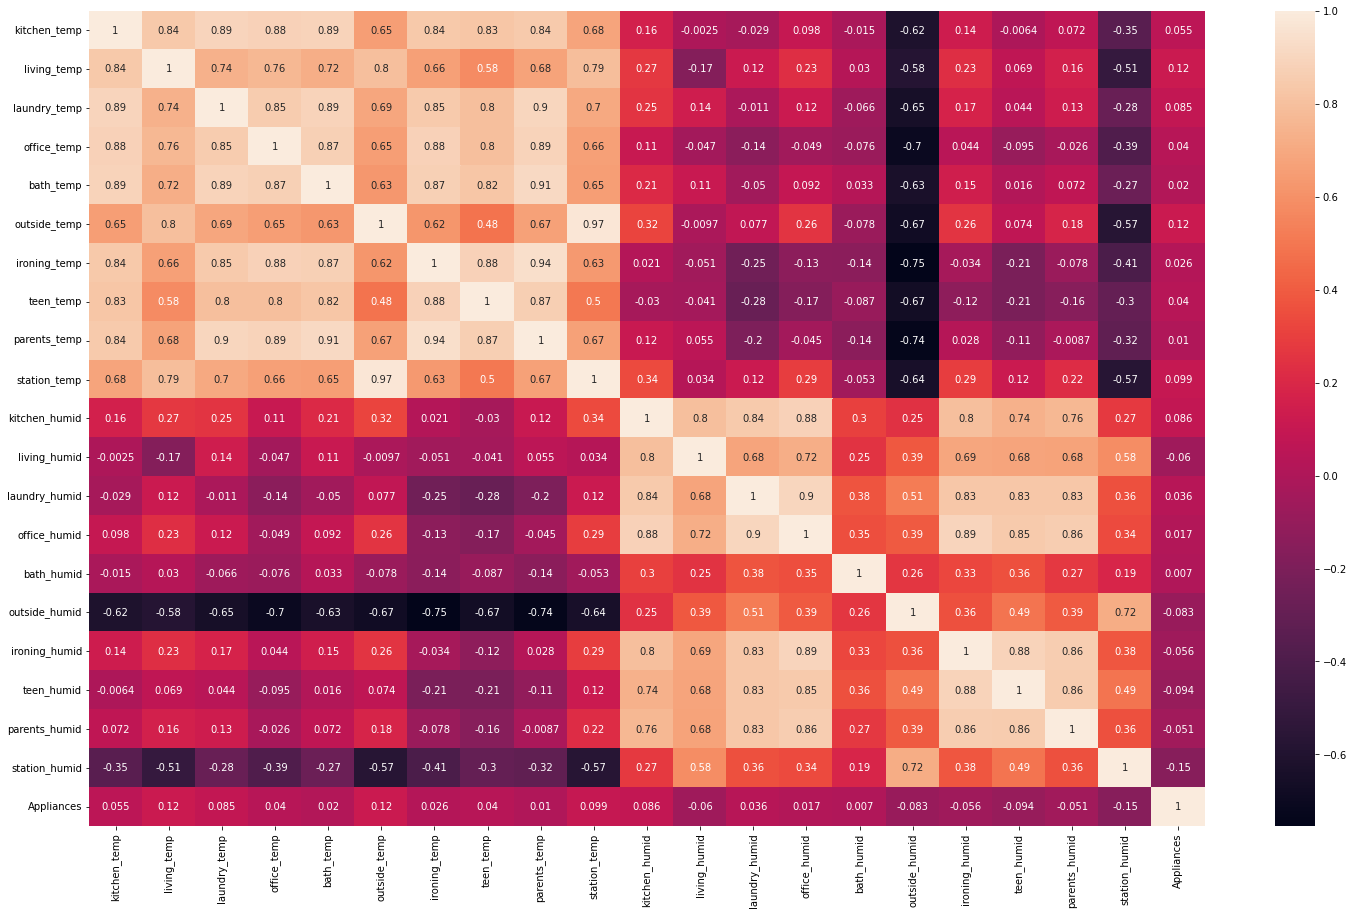

In [44]:
cols = list(temp.values())
cols.extend(list(humid.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(25,15))
sns.heatmap(energy[cols].corr(), ax=ax, annot=True)

***OBSERVATIONS*** ⚡:

1. From the correlation graph we clearly observe that the features related to temperature and features related to humidity have positive correlation within themselves whereas have a a very low or negative correlation with each other.

2. Humidity outside have a strong negative correlation with temperature levels.

3. Apart from that we observe that a couple features such as humidity at station, temperature outside the building and temperature in the living room have a comparatively high absolute correlation (above 0.12) with Appliances energy consumption.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [50]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential, layers, Input

In [51]:
warnings.filterwarnings('ignore')

In [53]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(energy,test_size=0.25,random_state=40)

## ***Data Pre Processing***

**Given this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column.**

In [57]:
humid.values()

dict_values(['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid', 'station_humid'])

In [58]:
temp.values()

dict_values(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp', 'station_temp'])

In [54]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'weekday', 'hour', 'month', 'WEEKDAY'],
      dtype='object')

In [59]:
# Divide the columns based on type for clear column management 

col_temp = ['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp']

col_hum = ['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid']

col_weather = ['station_temp', 'Tdewpoint','station_humid',"Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [61]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather]
target_vars = train[col_target]

In [66]:
#Split training dataset into independent and dependent varibales
X_train = train[feature_vars.columns]
y_train = train[target_vars.columns]

In [67]:
#Split testing dataset into independent and dependent varibales
X_test = test[feature_vars.columns]
y_test = test[target_vars.columns]

In [68]:
X_train.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid',
       'teen_humid', 'parents_humid', 'station_temp', 'Tdewpoint',
       'station_humid', 'Press_mm_hg', 'Windspeed', 'Visibility'],
      dtype='object')

In [69]:
X_test.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid',
       'teen_humid', 'parents_humid', 'station_temp', 'Tdewpoint',
       'station_humid', 'Press_mm_hg', 'Windspeed', 'Visibility'],
      dtype='object')

In [70]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [71]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

# ***Model Implementation***

We will be looking at following Algorithms

⚡***Improved Linear regression models***

1.Ridge regression

2.Lasso regression

⚡***Support Vector Machine***

3.Support vector regression

⚡***Nearest neighbour Regressor***

4.KNeighborsRegressor

⚡***Ensemble models***

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

⚡***Neural Network***

8.Multi Layer Preceptron Regressor

In [72]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [73]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [74]:
# # Run all the proposed models and update the information in a list model_data

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[06:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
results_df = df = pd.DataFrame(model_data)

In [76]:
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.018470,0.000000,-0.000031,0.984268
1,Ridge:,0.011591,0.149661,0.134760,0.915535
2,KNeighborsRegressor:,0.000639,0.679698,0.485718,0.705842
3,SVR:,11.534184,0.239142,0.213973,0.872620
4,RandomForest,33.314455,0.939153,0.587949,0.631804
5,ExtraTreeRegressor :,8.309007,1.000000,0.647956,0.583990
6,GradientBoostingClassifier:,7.812888,0.336856,0.257351,0.848200
7,XGBRegressor:,1.736216,0.324972,0.242367,0.856715
8,MLPRegressor:,3.837758,0.285638,0.229214,0.864119
